In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/Farhanrolastgaming/Klasifikasi-Dataset/refs/heads/main/earthquake_alert_balanced_dataset.csv"
column_names = ['Magnitudo', 'Kedalaman', 'CDI', 'MMI', 'SIG', 'Siaga']
df = pd.read_csv(url, names=column_names, skiprows=1)
# Mengubah kolom bertipe object ke numerik, kecuali 'Siaga'
for col in df.columns:
    if df[col].dtype == 'object' and col != 'Siaga':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Atur urutan kategori manual untuk kolom Siaga
order_siaga = ['green', 'yellow', 'orange', 'red']
df['Siaga'] = pd.Categorical(df['Siaga'], categories=order_siaga, ordered=True)
df['Siaga_kode'] = df['Siaga'].cat.codes + 1
num_cols = df.select_dtypes(include=['float', 'int']).columns
df[num_cols] = df[num_cols].fillna(0)
for col in num_cols:
    df[col] = df[col].round(0).astype(int)

In [3]:
# Tampilkan data pertama
print("Data Pertama:")
print(df.head())

# Cek informasi dasar dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

Data Pertama:
   Magnitudo  Kedalaman  CDI  MMI  SIG  Siaga  Siaga_kode
0          7         14    8    7    0  green           1
1          7         25    4    4  -33  green           1
2          7        579    3    3  -13  green           1
3          7         37    5    5   65  green           1
4          7        624    0    2  -98  green           1

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Magnitudo   1300 non-null   int64   
 1   Kedalaman   1300 non-null   int64   
 2   CDI         1300 non-null   int64   
 3   MMI         1300 non-null   int64   
 4   SIG         1300 non-null   int64   
 5   Siaga       1300 non-null   category
 6   Siaga_kode  1300 non-null   int8    
dtypes: category(1), int64(5), int8(1)
memory usage: 53.6 KB
None

Statistik Deskriptif:
         Magnitudo    Kedalaman          CDI 


Distribusi Target (Siaga_kode):
Siaga_kode
1    325
2    325
3    325
4    325
Name: count, dtype: int64

Ukuran Data Latih: (910, 5)
Ukuran Data Uji: (390, 5)

Prediksi Pertama:
[1 2 2 3 3]

Akurasi Model: 0.6795

Confusion Matrix:
[[61 27  9  1]
 [ 0 62 29  6]
 [ 0  8 62 28]
 [ 0  0 17 80]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.62      0.77        98
           2       0.64      0.64      0.64        97
           3       0.53      0.63      0.58        98
           4       0.70      0.82      0.75        97

    accuracy                           0.68       390
   macro avg       0.72      0.68      0.68       390
weighted avg       0.72      0.68      0.68       390



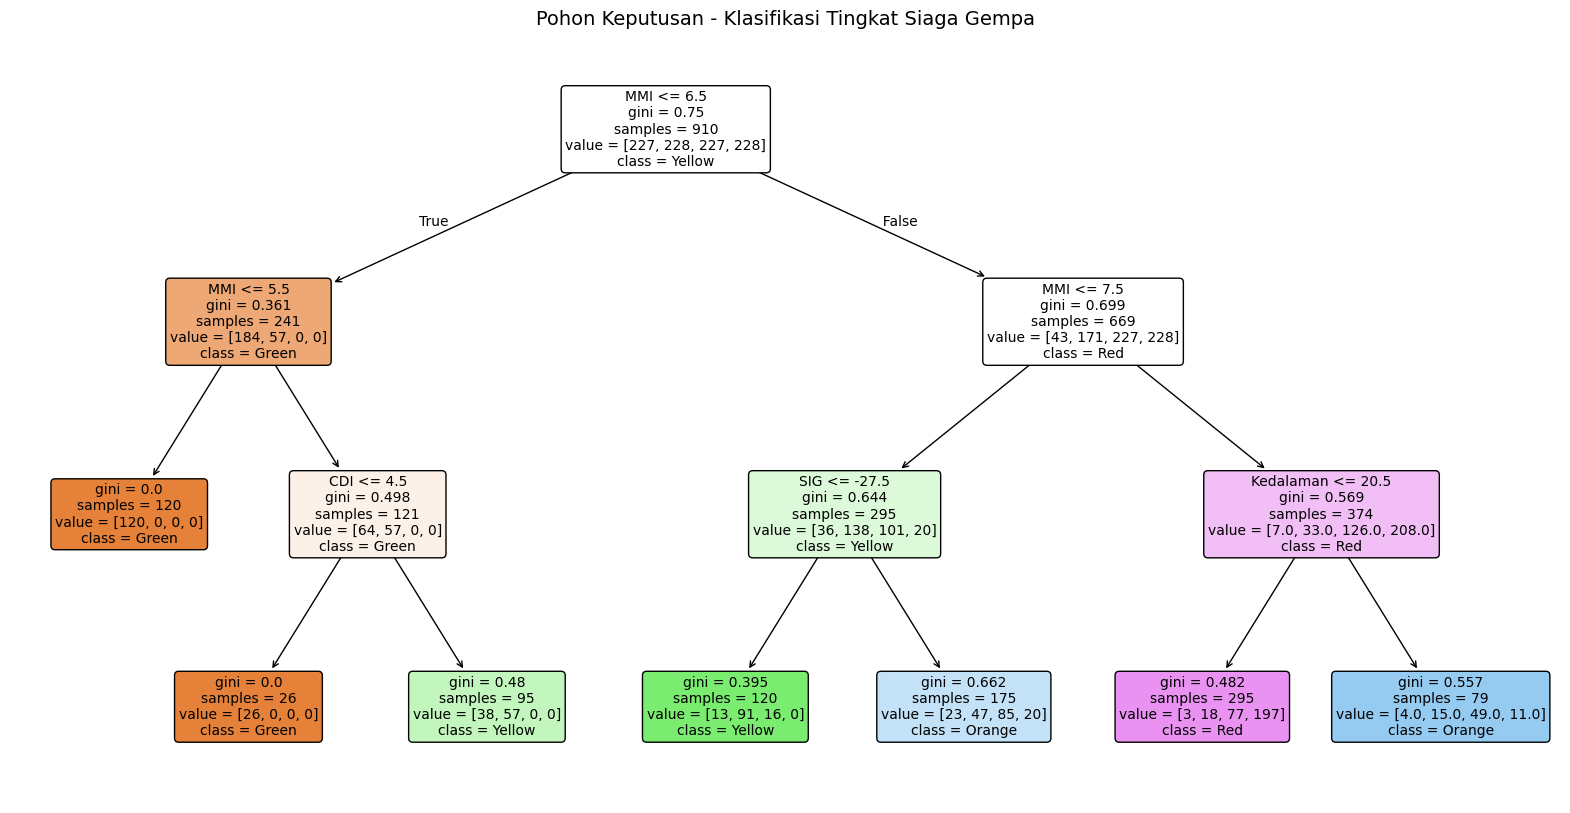

In [4]:
# Cek distribusi target
print("\nDistribusi Target (Siaga_kode):")
print(df['Siaga_kode'].value_counts().sort_index())

# Pisahkan fitur dan target
X = df.drop(columns=['Siaga', 'Siaga_kode'])
y = df['Siaga_kode']

# Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nUkuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")

# Buat model Decision Tree
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

# Prediksi data uji
y_pred = model_tree.predict(X_test)

print("\nPrediksi Pertama:")
print(y_pred[:5])

# Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

# 12. Visualisasi Pohon Keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    model_tree,
    filled=True,
    feature_names=X.columns,
    class_names=['Green', 'Yellow', 'Orange', 'Red'],
    rounded=True,
    fontsize=10
)
plt.title("Pohon Keputusan - Klasifikasi Tingkat Siaga Gempa", fontsize=14)
plt.show()